In [107]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm, trange
tqdm.pandas()

In [141]:
data = pd.read_csv('../data/reviews.csv', index_col=0)
data

,review,kinopoiskId,type,date,positiveRating,negativeRating,author,title,film_id
0,«Зеленую милю» я смотрела два раза: 10 лет наз...,3221833,NEUTRAL,2023-01-28T20:58:59,4,7,Yanchessa,NaN,435
1,Период конца девяностых годов-начало двухтысяч...,3146204,POSITIVE,2022-05-06T09:26:39,13,2,Fozzy,Магия или реальность,435
2,"Очень сложно писать рецензию на этот фильм, та...",3120334,POSITIVE,2022-01-24T21:36:34,21,2,Denis2oo3,"Что происходит на миле, остается на миле",435
3,Любимая многими миллионами ценителями киноиску...,3104371,POSITIVE,2021-12-19T09:09:50,10,2,kingwayne,Живи долго и счастливо!,435
4,В нашем мире существует много разных фильмов. ...,3096653,POSITIVE,2021-12-01T05:31:18,18,2,Юлия Березина - 1765,Шедевр!,435
...,...,...,...,...,...,...,...,...,...
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...,3214599,NEGATIVE,2023-01-09T01:55:11,3,1,Georgy_Olegovich,Марксисткий пасквиль против Ламборгини,969760
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и...",3211347,NEGATIVE,2022-12-29T19:07:13,48,4,Rosinanto,Американизированная версия итальянской биографии.,969760
90644,"Вообще, говоря о байопиках, стоит отметить, чт...",3209833,NEGATIVE,2022-12-24T19:23:18,72,7,Павел - 5699,Унылая повесть про яркую личность,969760
90645,"Визуальное качество, впрочем, также не безупре...",3201042,NEUTRAL,2022-11-26T19:49:37,309,28,devalmont,Ферруччо Ламборгини,969760


In [142]:
def str_clean(review: str, char_clean: bool = False, clean_mark_number_patterns: bool = False, lowercase: bool = False, replace_yo: bool = False):
    import re

    if char_clean:
        _html_pattern = r'<[^<]+?>'
        review = re.sub(_html_pattern, ' ', review)

    if clean_mark_number_patterns:
        mark_number_pattern = r'\d{1,2} из \d{1,2}'
        review = re.sub(mark_number_pattern, '  ', review)

    if replace_yo:
        review = review.replace('ё', 'е')
        review = review.replace('Ё', 'Е')

    if lowercase:
        review = review.lower()

    review = review.strip()

    return review

In [143]:
data['review'] = data['review'].progress_apply(
    str_clean,
    char_clean=True, 
    clean_mark_number_patterns=True,
)

  0%|          | 0/90647 [00:00<?, ?it/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [138]:
html_seq_count

28

In [111]:
data

,review,kinopoiskId,type,date,positiveRating,negativeRating,author,title,film_id
0,«Зеленую милю» я смотрела два раза: 10 лет наз...,3221833,NEUTRAL,2023-01-28T20:58:59,4,7,Yanchessa,NaN,435
1,Период конца девяностых годов-начало двухтысяч...,3146204,POSITIVE,2022-05-06T09:26:39,13,2,Fozzy,Магия или реальность,435
2,"Очень сложно писать рецензию на этот фильм, та...",3120334,POSITIVE,2022-01-24T21:36:34,21,2,Denis2oo3,"Что происходит на миле, остается на миле",435
3,Любимая многими миллионами ценителями киноиску...,3104371,POSITIVE,2021-12-19T09:09:50,10,2,kingwayne,Живи долго и счастливо!,435
4,В нашем мире существует много разных фильмов. ...,3096653,POSITIVE,2021-12-01T05:31:18,18,2,Юлия Березина - 1765,Шедевр!,435
...,...,...,...,...,...,...,...,...,...
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...,3214599,NEGATIVE,2023-01-09T01:55:11,3,1,Georgy_Olegovich,Марксисткий пасквиль против Ламборгини,969760
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и...",3211347,NEGATIVE,2022-12-29T19:07:13,48,4,Rosinanto,Американизированная версия итальянской биографии.,969760
90644,"Вообще, говоря о байопиках, стоит отметить, чт...",3209833,NEGATIVE,2022-12-24T19:23:18,72,7,Павел - 5699,Унылая повесть про яркую личность,969760
90645,"Визуальное качество, впрочем, также не безупре...",3201042,NEUTRAL,2022-11-26T19:49:37,309,28,devalmont,Ферруччо Ламборгини,969760


In [112]:
data[['review']].to_csv('../data/clean_reviews.csv')
data[['review']]

,review
0,«Зеленую милю» я смотрела два раза: 10 лет наз...
1,Период конца девяностых годов-начало двухтысяч...
2,"Очень сложно писать рецензию на этот фильм, та..."
3,Любимая многими миллионами ценителями киноиску...
4,В нашем мире существует много разных фильмов. ...
...,...
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и..."
90644,"Вообще, говоря о байопиках, стоит отметить, чт..."
90645,"Визуальное качество, впрочем, также не безупре..."


In [122]:
data['len'] = data['review'].str.len()
data

,review,kinopoiskId,type,date,positiveRating,negativeRating,author,title,film_id,token_count,len
0,«Зеленую милю» я смотрела два раза: 10 лет наз...,3221833,NEUTRAL,2023-01-28T20:58:59,4,7,Yanchessa,NaN,435,375,2527
1,Период конца девяностых годов-начало двухтысяч...,3146204,POSITIVE,2022-05-06T09:26:39,13,2,Fozzy,Магия или реальность,435,393,2718
2,"Очень сложно писать рецензию на этот фильм, та...",3120334,POSITIVE,2022-01-24T21:36:34,21,2,Denis2oo3,"Что происходит на миле, остается на миле",435,327,2201
3,Любимая многими миллионами ценителями киноиску...,3104371,POSITIVE,2021-12-19T09:09:50,10,2,kingwayne,Живи долго и счастливо!,435,208,1621
4,В нашем мире существует много разных фильмов. ...,3096653,POSITIVE,2021-12-01T05:31:18,18,2,Юлия Березина - 1765,Шедевр!,435,393,2588
...,...,...,...,...,...,...,...,...,...,...,...
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...,3214599,NEGATIVE,2023-01-09T01:55:11,3,1,Georgy_Olegovich,Марксисткий пасквиль против Ламборгини,969760,312,2201
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и...",3211347,NEGATIVE,2022-12-29T19:07:13,48,4,Rosinanto,Американизированная версия итальянской биографии.,969760,334,2317
90644,"Вообще, говоря о байопиках, стоит отметить, чт...",3209833,NEGATIVE,2022-12-24T19:23:18,72,7,Павел - 5699,Унылая повесть про яркую личность,969760,370,2550
90645,"Визуальное качество, впрочем, также не безупре...",3201042,NEUTRAL,2022-11-26T19:49:37,309,28,devalmont,Ферруччо Ламборгини,969760,414,2903


D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Progra

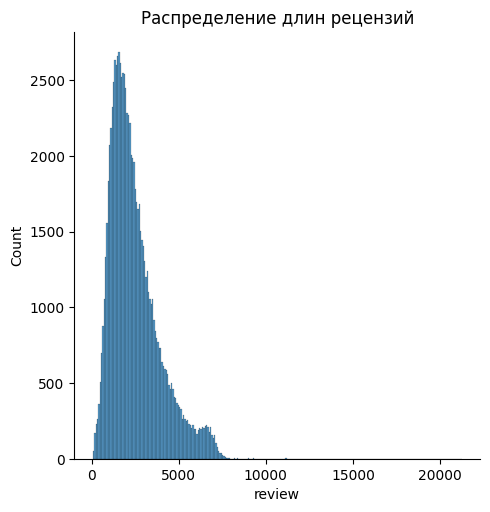

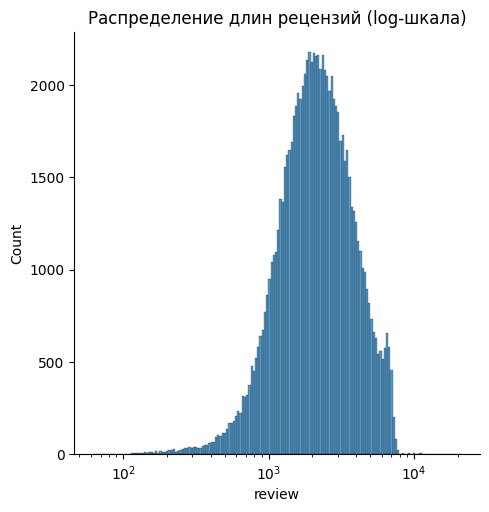

In [113]:
figure = sns.displot(data['review'].str.len())
plt.title('Распределение длин рецензий')
plt.savefig('data review.str.len.displot.png', dpi=400, bbox_inches = 'tight')

figure = sns.displot(data['review'].str.len(), log_scale=True)
plt.title('Распределение длин рецензий (log-шкала)')
plt.savefig('data review.str.len.displot.log.png', dpi=400, bbox_inches = 'tight')

---

In [114]:
data['token_count'] = data['review'].str.split()
data['token_count'] = data['token_count'].progress_apply(len)
data

  0%|          | 0/90647 [00:00<?, ?it/s]

,review,kinopoiskId,type,date,positiveRating,negativeRating,author,title,film_id,token_count
0,«Зеленую милю» я смотрела два раза: 10 лет наз...,3221833,NEUTRAL,2023-01-28T20:58:59,4,7,Yanchessa,NaN,435,375
1,Период конца девяностых годов-начало двухтысяч...,3146204,POSITIVE,2022-05-06T09:26:39,13,2,Fozzy,Магия или реальность,435,393
2,"Очень сложно писать рецензию на этот фильм, та...",3120334,POSITIVE,2022-01-24T21:36:34,21,2,Denis2oo3,"Что происходит на миле, остается на миле",435,327
3,Любимая многими миллионами ценителями киноиску...,3104371,POSITIVE,2021-12-19T09:09:50,10,2,kingwayne,Живи долго и счастливо!,435,208
4,В нашем мире существует много разных фильмов. ...,3096653,POSITIVE,2021-12-01T05:31:18,18,2,Юлия Березина - 1765,Шедевр!,435,393
...,...,...,...,...,...,...,...,...,...,...
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...,3214599,NEGATIVE,2023-01-09T01:55:11,3,1,Georgy_Olegovich,Марксисткий пасквиль против Ламборгини,969760,312
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и...",3211347,NEGATIVE,2022-12-29T19:07:13,48,4,Rosinanto,Американизированная версия итальянской биографии.,969760,334
90644,"Вообще, говоря о байопиках, стоит отметить, чт...",3209833,NEGATIVE,2022-12-24T19:23:18,72,7,Павел - 5699,Унылая повесть про яркую личность,969760,370
90645,"Визуальное качество, впрочем, также не безупре...",3201042,NEUTRAL,2022-11-26T19:49:37,309,28,devalmont,Ферруччо Ламборгини,969760,414


D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Progra

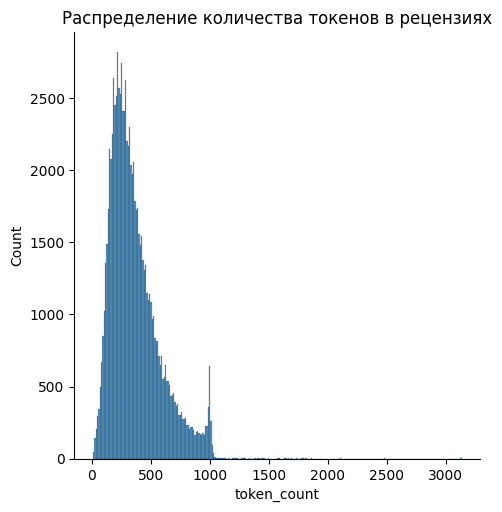

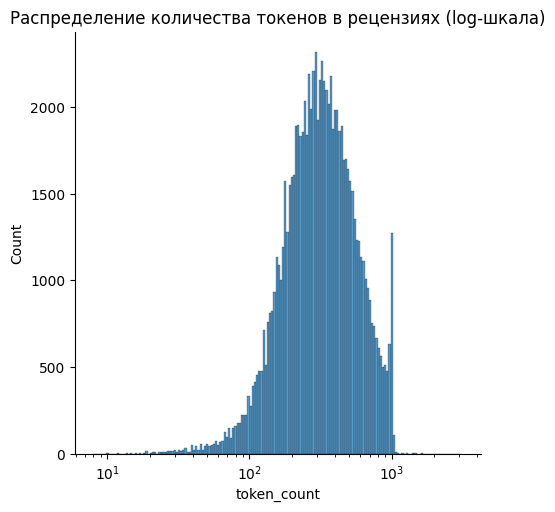

In [115]:
figure = sns.displot(data['token_count'])
plt.title('Распределение количества токенов в рецензиях')
plt.savefig('data review.str.tokenlen.displot.png', dpi=400, bbox_inches = 'tight')

figure = sns.displot(data['token_count'], log_scale=True)
plt.title('Распределение количества токенов в рецензиях (log-шкала)')
plt.savefig('data review.str.tokenlen.displot.log.png', dpi=400, bbox_inches = 'tight')

---

D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


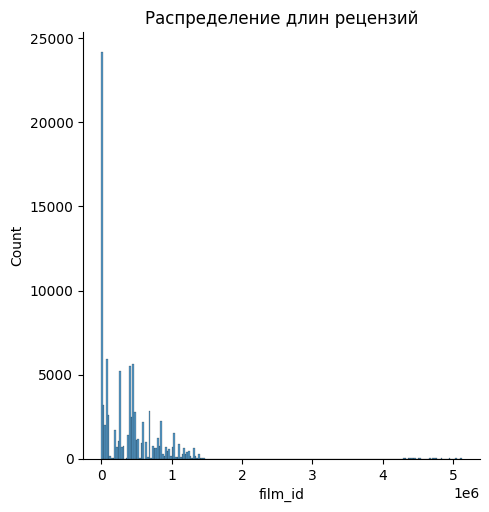

In [116]:
figure = sns.displot(data['film_id'])
plt.title('Распределение длин рецензий')
plt.savefig('data filmid displot.png', dpi=400, bbox_inches = 'tight')


In [117]:
df_film_id_n_reviews = data.groupby('film_id')[['review']].agg(len)
df_film_id_n_reviews = df_film_id_n_reviews.sort_values(by='review', ascending=False)
df_film_id_n_reviews.columns = ['number_of_reviews']
df_film_id_n_reviews

,number_of_reviews
film_id,
401177,1751
447301,1678
258687,1254
111543,1049
405609,1021
...,...
737716,1
1199528,1
3870,1


In [118]:
df_film_id_n_reviews.mean()

number_of_reviews    112.88543
dtype: float64

D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_23620\1486946342.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  figure = sns.histplot(df_film_id_n_reviews['number_of_reviews'], palette='Blues', bins=100)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


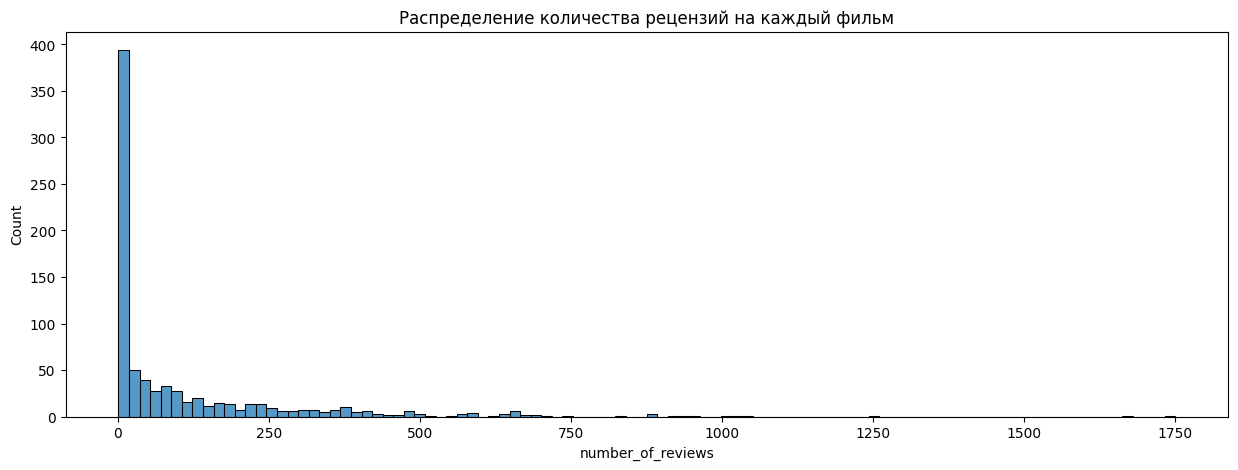

In [119]:
plt.figure(figsize=(15, 5))
figure = sns.histplot(df_film_id_n_reviews['number_of_reviews'], palette='Blues', bins=100)
plt.title('Распределение количества рецензий на каждый фильм')
plt.savefig('data n_reviews.displot.png', dpi=400, bbox_inches = 'tight')


---

In [120]:
data

,review,kinopoiskId,type,date,positiveRating,negativeRating,author,title,film_id,token_count
0,«Зеленую милю» я смотрела два раза: 10 лет наз...,3221833,NEUTRAL,2023-01-28T20:58:59,4,7,Yanchessa,NaN,435,375
1,Период конца девяностых годов-начало двухтысяч...,3146204,POSITIVE,2022-05-06T09:26:39,13,2,Fozzy,Магия или реальность,435,393
2,"Очень сложно писать рецензию на этот фильм, та...",3120334,POSITIVE,2022-01-24T21:36:34,21,2,Denis2oo3,"Что происходит на миле, остается на миле",435,327
3,Любимая многими миллионами ценителями киноиску...,3104371,POSITIVE,2021-12-19T09:09:50,10,2,kingwayne,Живи долго и счастливо!,435,208
4,В нашем мире существует много разных фильмов. ...,3096653,POSITIVE,2021-12-01T05:31:18,18,2,Юлия Березина - 1765,Шедевр!,435,393
...,...,...,...,...,...,...,...,...,...,...
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...,3214599,NEGATIVE,2023-01-09T01:55:11,3,1,Georgy_Olegovich,Марксисткий пасквиль против Ламборгини,969760,312
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и...",3211347,NEGATIVE,2022-12-29T19:07:13,48,4,Rosinanto,Американизированная версия итальянской биографии.,969760,334
90644,"Вообще, говоря о байопиках, стоит отметить, чт...",3209833,NEGATIVE,2022-12-24T19:23:18,72,7,Павел - 5699,Унылая повесть про яркую личность,969760,370
90645,"Визуальное качество, впрочем, также не безупре...",3201042,NEUTRAL,2022-11-26T19:49:37,309,28,devalmont,Ферруччо Ламборгини,969760,414


In [123]:
(data['len'] / data['token_count']).mean()

6.818755110410769